In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import torch

In [3]:
torch.__version__

'2.5.1+cu124'

In [4]:
torch.cuda.is_available()

True

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv("/content/drive/MyDrive/Diplom/data/close_adjusted_17.csv")

# Convert 'date' to datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Set 'date' as index
df.set_index("date", inplace=True)

In [10]:
#Getting rid of missing values
df = df.ffill().bfill()

In [11]:
df

,CSCO.close,UAL.close,TROW.close,ISRG.close,PRGO.close,TPR.close,DVN.close,MRO.close,BA.close,VRTX.close,...,TSS.close,CRM.close,PGR.close,WAT.close,BWA.close,LRCX.close,NWL.close,UAA.close,BLK.close,PPL.close
date,,,,,,,,,,,,,,,,,,,,,
2006-01-04,12.4822,40.3514,22.5279,13.5622,12.6991,22.6417,48.0416,14.2195,50.6391,28.3100,...,19.89,8.9925,16.4971,37.83,12.7070,32.2894,13.8143,4.0809,71.5851,12.7212
2006-01-05,12.8319,40.3514,22.5094,13.3645,12.8243,22.9809,47.4447,14.1722,50.0414,29.4800,...,20.47,9.0150,16.6350,37.26,12.4629,32.8907,13.8660,4.6014,70.8115,12.4858
2006-01-06,13.1256,40.3514,22.6938,13.3411,12.9662,23.0570,48.4785,14.3465,49.3441,31.2800,...,20.32,9.9625,16.5298,37.35,12.1397,34.0498,13.7856,4.5807,72.3982,12.5488
2006-01-09,13.3283,40.3514,23.0010,13.7445,12.9913,23.9015,48.3765,14.6197,48.9314,33.0999,...,20.18,9.6325,16.8952,38.34,12.2002,34.3897,13.9406,4.6272,73.2374,12.6287
2006-01-10,13.2654,40.3514,22.9150,14.2489,13.2334,23.7285,48.4493,14.9509,49.1662,34.0400,...,20.48,9.5625,16.8568,38.96,12.1897,33.7797,13.7569,4.8429,73.5390,12.5656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-19,49.1300,47.5400,105.4471,313.6100,33.3725,42.7021,49.0047,23.0700,205.4900,341.7000,...,118.84,210.3600,135.0600,267.48,45.9820,587.2413,8.6210,7.3000,661.8330,26.8195
2023-05-22,48.8200,47.4100,105.6745,313.6200,33.0850,41.8878,49.1242,23.4300,205.9100,339.9700,...,118.84,210.2600,135.6300,267.81,47.4666,583.4617,8.8590,7.3900,666.4888,26.7897
2023-05-23,48.9100,47.8700,104.8635,301.4400,32.8173,41.6494,48.9151,23.6400,202.6000,333.5100,...,118.84,206.6400,133.3500,265.92,46.5599,571.9135,8.9483,7.3900,656.7007,26.5420


Keeping shorter time of dataframe(a year by default).

In [123]:
#Keeping smaller, 1 year data
smaller_df = df.iloc[:]

#Returns dataframe
returns = ((smaller_df - smaller_df.shift(1)) / smaller_df.shift(1)).iloc[1:]

In [127]:
returns

,CSCO.close,UAL.close,TROW.close,ISRG.close,PRGO.close,TPR.close,DVN.close,MRO.close,BA.close,VRTX.close,...,TSS.close,CRM.close,PGR.close,WAT.close,BWA.close,LRCX.close,NWL.close,UAA.close,BLK.close,PPL.close
date,,,,,,,,,,,,,,,,,,,,,
2006-01-05,0.028016,0.000000,-0.000821,-0.014577,0.009859,0.014981,-0.012425,-0.003326,-0.011803,0.041328,...,0.029160,0.002502,0.008359,-0.015067,-0.019210,0.018622,0.003742,0.127545,-0.010807,-0.018505
2006-01-06,0.022888,0.000000,0.008192,-0.001751,0.011065,0.003311,0.021790,0.012299,-0.013934,0.061058,...,-0.007328,0.105103,-0.006324,0.002415,-0.025933,0.035241,-0.005798,-0.004499,0.022407,0.005046
2006-01-09,0.015443,0.000000,0.013537,0.030237,0.001936,0.036627,-0.002104,0.019043,-0.008364,0.058181,...,-0.006890,-0.033124,0.022106,0.026506,0.004984,0.009982,0.011244,0.010151,0.011591,0.006367
2006-01-10,-0.004719,0.000000,-0.003739,0.036698,0.018636,-0.007238,0.001505,0.022654,0.004799,0.028402,...,0.014866,-0.007267,-0.002273,0.016171,-0.000861,-0.017738,-0.013177,0.046616,0.004118,-0.004997
2006-01-11,0.022668,0.000000,0.024805,-0.007172,0.010096,-0.021295,-0.017579,0.005471,0.014473,-0.003496,...,0.013672,0.000523,-0.004218,0.004877,-0.002560,0.022961,-0.000422,0.005059,-0.014622,-0.004679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-19,0.019295,-0.012258,-0.010029,0.004420,0.006882,-0.025605,0.019054,0.000868,-0.008444,0.006599,...,0.000000,-0.013876,-0.007714,-0.002126,0.026011,-0.016501,-0.032283,-0.041995,-0.003929,-0.005875
2023-05-22,-0.006310,-0.002735,0.002157,0.000032,-0.008615,-0.019069,0.002439,0.015605,0.002044,-0.005063,...,0.000000,-0.000475,0.004220,0.001234,0.032287,-0.006436,0.027607,0.012329,0.007035,-0.001111
2023-05-23,0.001844,0.009703,-0.007675,-0.038837,-0.008091,-0.005691,-0.004257,0.008963,-0.016075,-0.019002,...,0.000000,-0.017217,-0.016810,-0.007057,-0.019102,-0.019793,0.010080,0.000000,-0.014686,-0.009246


Markowitz optimization function using stochastic gradient descent, using pytorch for calculations to be done on GPU.

In [125]:
def markowitz_optimization_pytorch(returns, target_return, learning_rate=1e-3, max_iter=1000, device='cuda'):
    """
    Markowitz portfolio optimization using PyTorch with gradient descent.

    Parameters:
        returns (torch.Tensor): Matrix of asset returns (n_assets x n_days)
        target_return (float): The target portfolio return to optimize
        learning_rate (float): Learning rate for gradient descent
        max_iter (int): Maximum number of iterations for optimization
        device (str): Device to run the model on ('cuda' for GPU or 'cpu' for CPU)

    Returns:
        torch.Tensor: Optimal portfolio weights (n_assets,)
    """
    # Converting pd.DataFrame to torch.tensor
    returns = torch.tensor(returns.values, dtype=torch.float64, device=device)

    # Step 1: Calculate expected returns and covariance matrix
    mean_returns = torch.mean(returns, dim=0)  # n_assets x 1
    cov_matrix = torch.cov(returns.T)  # n_assets x n_assets

    # Step 2: Initialize weights (uniform distribution, long-only portfolio)
    n_assets = returns.shape[1]
    weights = torch.ones(n_assets, dtype=torch.float64, device=device) / n_assets  # Start with equal weights
    weights.requires_grad = True  # We want to compute gradients for optimization

    # Step 3: Gradient descent to minimize portfolio variance and meet target return
    optimizer = torch.optim.SGD([weights], lr=learning_rate)  # Stochastic Gradient Descent for optimization

    for _ in range(max_iter):
        # Portfolio return and variance (risk)
        portfolio_return = torch.dot(mean_returns, weights)  # Expected return of the portfolio
        portfolio_variance = torch.matmul(weights.T, torch.matmul(cov_matrix, weights))  # Portfolio variance (risk)

        # Portfolio loss (minimize variance)
        loss = portfolio_variance

        # Add penalty to bring portfolio return closer to target_return
        loss += torch.abs(portfolio_return - target_return) * 1000  # A large weight for the return constraint

        # Step 4: Update weights using gradient descent
        optimizer.zero_grad()  # Zero previous gradients

        # loss.requires_grad = True  # Set the loss tensor to require gradients IDK WHY
        loss.backward()  # Compute gradients

        optimizer.step()  # Update weights

        # # Step 5: Normalize weights so that they sum to 1
        # with torch.no_grad():
        #     weights = torch.clamp(weights, min=0)  # Ensure weights are non-negative (long-only portfolio)
        #     weights /= torch.sum(weights)  # Normalize so weights sum to 1

        # Step 5: Normalize weights so that they sum to 1 (in-place operations)
        with torch.no_grad():
            weights.data = torch.clamp(weights.data, min=0)  # Ensure weights are non-negative (long-only portfolio)
            weights.data /= torch.sum(weights.data)  # Normalize so weights sum to 1

        # Optionally, print out the status
        # if _ % 100 == 0:
        #     print(f"Iteration {_}: Portfolio return = {portfolio_return.item():.4f}, Portfolio variance = {portfolio_variance.item():.4f}")

    return weights

Rolling Markowitz Optimization

[1.         1.01120641 1.02350464 ... 8.138908   8.07007869 8.05589951]


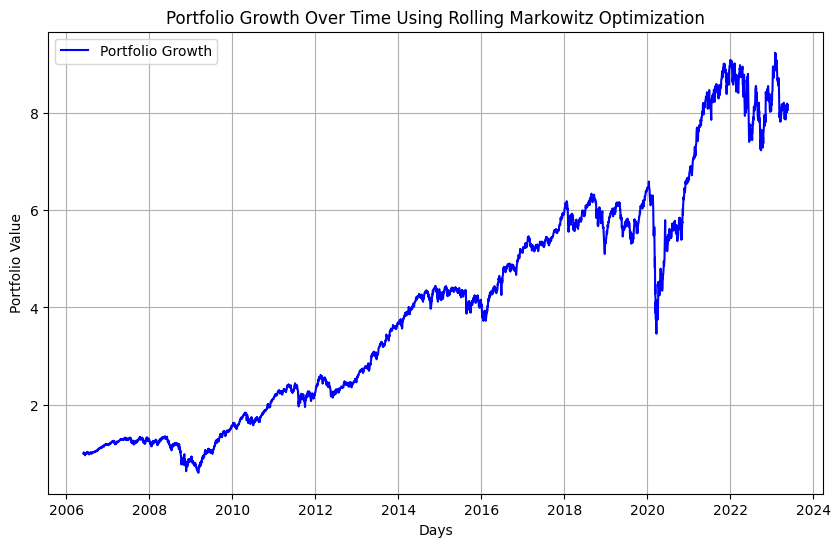

In [128]:
# Portfolio value tracking
portfolio_value = [1]  # Start with 1

# Rolling window Markowitz portfolio simulation
window_size = 100  # Use past 100 days of returns

for t in range(window_size, len(returns)):
    # Get Markowitz optimal weights from our weight array
    optimal_weights = markowitz_optimization_pytorch(returns.iloc[t-window_size:t], target_return=returns.mean().mean(), learning_rate=1e-3, max_iter=1000, device='cuda')
    # Convert to NumPy array
    optimal_weights = optimal_weights.cpu().detach().numpy()

    # Compute portfolio return on day 101
    next_day_return = np.dot(optimal_weights, returns.iloc[t])

    # print(f"Weights: {optimal_weights}")
    # print(f"Day {t} return: {next_day_return}")

    # Update portfolio value
    portfolio_value.append(portfolio_value[-1] * (1 + next_day_return))

# Convert to numpy array for easier plotting
portfolio_value = np.array(portfolio_value)

print(portfolio_value)
# Plot portfolio growth
plt.figure(figsize=(10, 6))
plt.plot(returns.index[99:], portfolio_value, label='Portfolio Growth', color='blue')
plt.title("Portfolio Growth Over Time Using Rolling Markowitz Optimization")
plt.xlabel("Days")
plt.ylabel("Portfolio Value")
# plt.ylim(0.9999, 1.000001)
plt.legend()
plt.grid(True)
plt.show()
